# T-Test Example
Benjamin Xie
University of Denver CS
benji.xie@du.edu

22 Oct 2025

COMP 3100/4100: Human-Computer Interaction

Data from [Bay Air Center](https://bayaircenter.org/).

In [1]:
import numpy as np
from scipy.stats import ttest_ind, levene, shapiro # for t-tests and checking assumptions
import pandas as pd
import matplotlib.pyplot as plt # for visualization

In [2]:
# read data
df = pd.read_csv('air_quality.csv')

# t-test (two samples/student's)
## Is there a difference in air quality between East Palo Alto and Palo Alto?

factor: city
levels: {East Palo Alto ("EPA or BH"), Palo Alto ("PA or MP")}

In [3]:
aqi_epa = df[df['city'] == "EPA or BH"]['aqi']
aqi_paly = df[df['city'] == "PA or MP"]['aqi']

In [4]:
t_statistic, p_value = ttest_ind(aqi_epa, aqi_paly)
p_value

1.8768108496139391e-23

In [5]:
# AQI: higher means worse air quality
print(aqi_epa.mean())
print(aqi_paly.mean())

36.02056277056277
30.97697922515441


=> the air quality in East Palo Alto is significantly worse than the air quality in Palo Alto

# Testing Assumptions

In [6]:
# test for homoscedacity https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
statistic, pvalue = levene(aqi_epa, aqi_paly)
pvalue # if <0.05, then fails homoscedacity

0.02242654010431343

In [7]:
# Test for normality
test_statistic, pvalue = shapiro(df["aqi"])
pvalue # if <0.05, then fails Shapiro-Wilks test and data not normal

4.207258509288831e-41

# Effect Size

In [8]:
# https://www.askpython.com/python/examples/cohens-d-python
def cohens_d(group1, group2):
    # Calculating means of the two groups
    mean1, mean2 = np.mean(group1), np.mean(group2)
     
    # Calculating pooled standard deviation
    std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((n1 - 1) * std1 ** 2 + (n2 - 1) * std2 ** 2) / (n1 + n2 - 2))
     
    # Calculating Cohen's d
    d = (mean1 - mean2) / pooled_std
     
    return d

effect_size = cohens_d(aqi_epa, aqi_paly)
effect_size

0.33368085404049663

# Visualize your data

(array([7.000e+02, 1.718e+03, 6.840e+02, 4.990e+02, 1.600e+01, 2.000e+00,
        7.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([  6. ,  21.9,  37.8,  53.7,  69.6,  85.5, 101.4, 117.3, 133.2,
        149.1, 165. ]),
 <BarContainer object of 10 artists>)

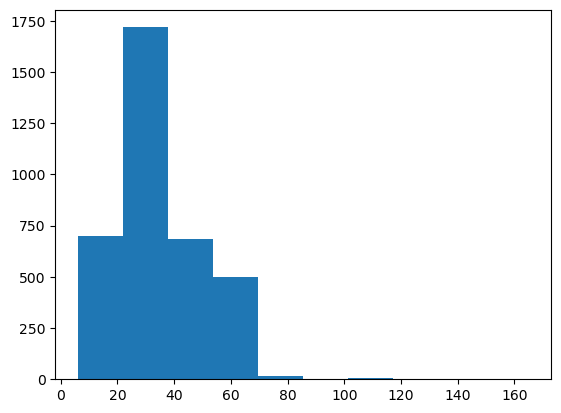

In [9]:
plt.hist(df['aqi'])